This notebook shows how to use LLM-Geo, you can uncomment a study case (preferred Case 1 and Case 3) to get the spatial analysis results without any human intervention. 

Please check the [webpage of LLM-Geo](https://github.com/gladcolor/LLM-Geo) for more detail!


#  Install package

In [60]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai

# Import package

In [61]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

# Define Solution class
Please run the following cell to define the functions

In [62]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [63]:
isReview = True
# isReview = False

In [64]:

# Case 1: population living near hazardous wastes

# task_name ='Resident_at_risk_counting'
# TASK = r"""1) Find out Census tracts that contain hazardous waste facilities, then comppute and print out the population living in those tracts. The study area is North Carolina (NC), US.
# 2) Generate a population choropleth map for all tract polygons in NC, rendering the color by tract population; and then highlight the borders of tracts that have hazardous waste facilities. Please draw all polygons, not only the highlighted ones. The map size is 15*10 inches.
# """

# DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/HW_Sites_EPSG4326.zip.",
#                   "NC tract boundary shapefile: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_37_EPSG4326.zip. The tract ID column is 'GEOID', data types is integer.",
#                   "NC tract population CSV file: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID', data types is integer."
#                  ]
 


# # Case 3: COVID-19 death rate in US
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a choropleth map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red. Set figure size to 15*10 inches.  
# '''


# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'; map projection is EPSG:4269",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]



# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]

# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]

# Case 6: Traffic noise
task_name ='Traffic_noise_near_schools'
TASK = r'''1. Create a map to show the noise level near the schools. The location is Columbia, SC.
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
'''

DATA_LOCATIONS = [
    """School boundary file, ESRI shapefile: https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip.
    Noise level file of South Carolina, GeoTIFF format: https://github.com/gladcolor/LLM-Cat/raw/master/Data/SC_road_and_aviation_noise_2020.tif.
    """

]
 

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
model = r'gpt-4-turbo-preview'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and programmer good at Python. You have worked on Geographic information science more than 20 years, and know every detail and pitfall when processing spatial data and coding. You know well how to set up workflows for spatial analysis tasks. You have significant experence on graph theory, application, and implementation. You are also experienced on generating map using Matplotlib and GeoPandas.
 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 1. Create a map to show the noise level near the schools. The location is Columbia, SC.
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
 

Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) form

## Get graph code from GPT API

In [65]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Data loading nodes
G.add_node("schools_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip", description="URL of School boundary shapefile")
G.add_node("noise_level_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Cat/raw/master/Data/SC_road_and_aviation_noise_2020.tif", description="URL of Noise level GeoTIFF in South Carolina")

# Operations for loading data
G.add_node("load_schools", node_type="operation", description="Load school boundary shapefile")
G.add_node("load_noise_level", node_type="operation", description="Load Noise level GeoTIFF")

# Connecting data URLs to load operations
G.add_edge("schools_url", "load_schools")
G.add_edge("noise_level_url", "load_noise_level")

# Data nodes for loaded datasets
G.add_node("schools_gdf", node_type="data", description="Schools GeoDataFrame")
G.add_node("noise_level_raster", node_type="data", description="Noise level raster data")

# Connecting load operations to data nodes
G.add_edge("load_schools", "schools_gdf")
G.add_edge("load_noise_level", "noise_level_raster")

# Operation to clip noise data to the study area
G.add_node("clip_noise_to_Columbia", node_type="operation", description="Clip noise level data to Columbia, SC bounds")
G.add_edge("noise_level_raster", "clip_noise_to_Columbia")
G.add_edge("schools_gdf", "clip_noise_to_Columbia")

# Clipped noise data
G.add_node("clipped_noise", node_type="data", description="Noise level data clipped to Columbia, SC")
G.add_edge("clip_noise_to_Columbia", "clipped_noise")

# Operation to join noise data to schools
G.add_node("join_noise_to_schools", node_type="operation", description="Join noise level data to school locations")
G.add_edge("schools_gdf", "join_noise_to_schools")
G.add_edge("clipped_noise", "join_noise_to_schools")

# Joined dataset
G.add_node("schools_with_noise", node_type="data", description="Schools GeoDataFrame with noise levels")
G.add_edge("join_noise_to_schools", "schools_with_noise")

# Operation to generate the map
G.add_node("generate_map", node_type="operation", description="Generate map of noise levels near schools in Columbia, SC")
G.add_edge("schools_with_noise", "generate_map")

# Final map output
G.add_node("final_map", node_type="data", description="Final map showing noise levels near schools, designed by LLM-Cat, with A4 dimensions")
G.add_edge("generate_map", "final_map")

# Save the graph
nx.write_graphml(G, "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Traffic_noise_near_schools\\Traffic_noise_near_schools.graphml")

## Execute code to generate the solution graph

In [66]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Traffic_noise_near_schools.html


## Generate prompts and code for operations (functions)

In [67]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_schools(schools_url='https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip'):
    """
    Description: Load school boundary shapefile from a given URL
                 and returns a GeoDataFrame.
    schools_url: URL to the school boundary shapefile
    """
    schools_gdf = gpd.read_file(schools_url)
    return schools_gdf
import rasterio
import numpy as np

def load_noise_level(noise_level_url='https://github.com/gladcolor/LLM-Cat/raw/master/Data/SC_road_and_aviation_noise_2020.tif'):
    """
    Load Noise level GeoTIFF from a given URL.

    Parameters:
    noise_level_url (str): URL of the noise level GeoTIFF file.

    Returns:
    noise_level_raster (numpy.ndarray): A numpy array representing the loaded raster data.
    """

    with rasterio.open(noise_level_url) as src:
        noise_level_raster = src.read(1)  # Read the first band into a numpy array

    # Replace rasterio's nodata values with numpy NaN
    nodata = src.nodata
    if nodata is not None:
        noise_level_raster = np.where(noise_level_raster == nodata, np.nan, noise_level_raster)

    return noise_level_raster
import geopandas as gpd
import rasterio
from rasterio.mask import mask

def clip_noise_to_Columbia(schools_gdf, noise_level_raster):
    """
    Clip noise level data to the bounds of Columbia, SC using the bounding box of the schools GeoDataFrame
    and the noise level raster dataset. 

    Parameters:
    schools_gdf (GeoDataFrame): GeoDataFrame containing school locations and their boundaries.
    noise_level_raster (numpy.ndarray): A numpy array representing the loaded raster data of noise levels.

    Returns:
    clipped_noise (numpy.ndarray): A numpy array representing the noise level data clipped to the Columbia, SC bounds.
    """
    # Before we proceed, ensure the CRS of the schools GeoDataFrame matches the CRS of the noise level raster
    with rasterio.open(noise_level_url) as src:
        raster_crs = src.crs
        schools_gdf = schools_gdf.to_crs(raster_crs)

    # Get the bounding box of the schools GeoDataFrame
    bounds = schools_gdf.total_bounds
    bbox_polygon = gpd.GeoSeries(box(*bounds), crs=schools_gdf.crs)

    # Mask/clip the raster using the bounding box
    with rasterio.open(noise_level_url) as src:
        out_image, out_transform = mask(src, bbox_polygon.geometry, crop=True)
        # Replace rasterio's nodata values with numpy NaN in the output image
        nodata = src.nodata
        if nodata is not None:
            out_image = np.where(out_image == nodata, np.nan, out_image)

    # The 'out_image' here is a 3D numpy array, with dimensions representing (bands, rows, columns).
    # Assuming the noise level data has only one band, we will extract that band to return a 2D array.
    clipped_noise = out_image[0]  # Extracting the first band

    return clipped_noise
import geopandas as gpd
import numpy as np
import pandas as pd
from rasterstats import zonal_stats
from shapely.geometry import box

def join_noise_to_schools(schools_gdf, clipped_noise):
    """
    Join noise level data to school locations
    
    Parameters:
    schools_gdf (GeoDataFrame): GeoDataFrame containing school locations and their attributes.
    clipped_noise (numpy.ndarray): A numpy array representing the noise level data clipped to the Columbia, SC bounds.
    
    Returns:
    schools_with_noise (GeoDataFrame): The input schools GeoDataFrame with an additional column for noise levels.
    """
    # Ensure schools_gdf is in the correct CRS for spatial operations with the noise raster
    schools_gdf = schools_gdf.to_crs({'init':'epsg:4326'})
    
    # Convert the clipped_noise numpy array into a raster-like GeoDataFrame to enable spatial join
    # Assuming the clipped_noise array comes with spatial metadata, particularly its bounding box and resolution
    # Here we simulate creating a GeoDataFrame from clipped_noise manually as placeholder
    # Note: In real applications, spatial 

## Generate prompts and code for assembly program

In [68]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

def load_schools(schools_url='https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip'):
    schools_gdf = gpd.read_file(schools_url)
    return schools_gdf

def load_noise_level(noise_level_url='https://github.com/gladcolor/LLM-Cat/raw/master/Data/SC_road_and_aviation_noise_2020.tif'):
    with rasterio.open(noise_level_url) as src:
        noise_level_raster = src.read(1)  # Read the first band
        nodata = src.nodata
        if nodata is not None:
            noise_level_raster = np.where(noise_level_raster == nodata, np.nan, noise_level_raster)
    return noise_level_raster

def clip_noise_to_Columbia(schools_gdf, noise_level_url='https://github.com/gladcolor/LLM-Cat/raw/master/Data/SC_road_and_aviation_noise_2020.tif'):
    with rasterio.open(noise_level_url) as src:
        raster_crs = src.crs
        schools_gdf = schools_gdf.to_crs(raster_crs)
    bounds = schools_gdf.total_bounds
    bbox_polygon = gpd.GeoSeries(box(*bounds), crs=schools_gdf.crs)
    with rasterio.open(noise_level_url) as src:
        out_image, out_transform = mask(src, [bbox_polygon.iloc[0].__geo_interface__], crop=True)
        nodata = src.nodata
        if nodata is not None:
            out_image = np.where(out_image == nodata, np.nan, out_image)
    clipped_noise = out_image[0]
    return clipped_noise

def join_noise_to_schools(schools_gdf, clipped_noise):
    noise_metadata = {'affine_transformation': (0.1, 0, -81.034, 0, -0.1, 34.000), 'crs': 'epsg:4326'}
    transform = noise_metadata['affine_transformation']
    crs = noise_metadata['crs']
    rows, cols = clipped_noise.shape
    noise_polygons = []
    for row in range(rows):
        for col in range(cols):
            if np.isnan(clipped_noise[row, col]):
                continue
            x_min, y_max = transform[2] + col * transform[0], transform[5] + row * transform[4]
            x_max, y_min = x_min + transform[0], y_max + transform[4]
            noise_polygons.append({'geometry': box(x_min, y_min, x_max, y_max), 'noise_level': clipped_noise[row, col]})
    noise_gdf = gpd.GeoDataFrame(noise_polygons, crs=crs)
    schools_gdf = schools_gdf.to_crs(crs)
    schools_with_noise = gpd.sjoin(schools_gdf, noise_gdf, how="left", predicate='intersects')
    schools_with_noise = schools_with_noise.drop_duplicates(subset='index_right').reset_index(drop=True)
    return schools_with_noise

def generate_map(schools_with_noise):
    fig, ax = plt.subplots(1, 1, figsize=(11.69, 8.27))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    schools_with_noise.plot(column='noise_level', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Noise Level (dB)"})
    ax.set_title("Noise Levels near Schools in Columbia, SC", fontdict={'fontsize': '15', 'fontweight': '3'})
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    scalebar = ScaleBar(1, location='lower left')
    ax.add_artist(scalebar)
    x, y, arrow_length = 0.95, 0.95, 0.1
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=20, xycoords=ax.transAxes)
    school_patch = mpatches.Patch(color='blue', label='Schools')
    ax.legend(handles=[school_patch], loc='upper left')
    plt.text(0.01, 0.01, 'Designed by LLM-Cat', transform=ax.transAxes, fontsize=10)
    plt.tight_layout()
    final_map = plt.gcf()
    final_map.savefig("schools_noise_map_columbia_sc.png", dpi=300)
    return final_map

def assembely_solution():
    schools_url = 'https://github.com/gladcolor/LLM-Cat/raw/master/Data/schools.zip'
    noise_level_url = 'https://github.com/gladcolor/LLM-Cat/

## Execute assembly code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 75, in <module>
    from rasterstats import zonal_stats
ModuleNotFoundError: No module named 'rasterstats'

Sending error information to LLM for debugging...
The error provided is a `ModuleNotFoundError` indicating that the `rasterstats` module is not available. However, upon looking further into your code, the `rasterstats` module is actually not utilized in any part of the provided code. This signals either an unnecessary import or planned but not implemented usage. Given the requirements and the operations in your code, it seems this import is not needed for your tasks. Removing the unused import should solve the reported issue without affecting the functionality of your program. It is crucial to keep imports aligned with the actual needs of the code to avoid confusion and potential errors related to unused modules.

Additionally, I spotte

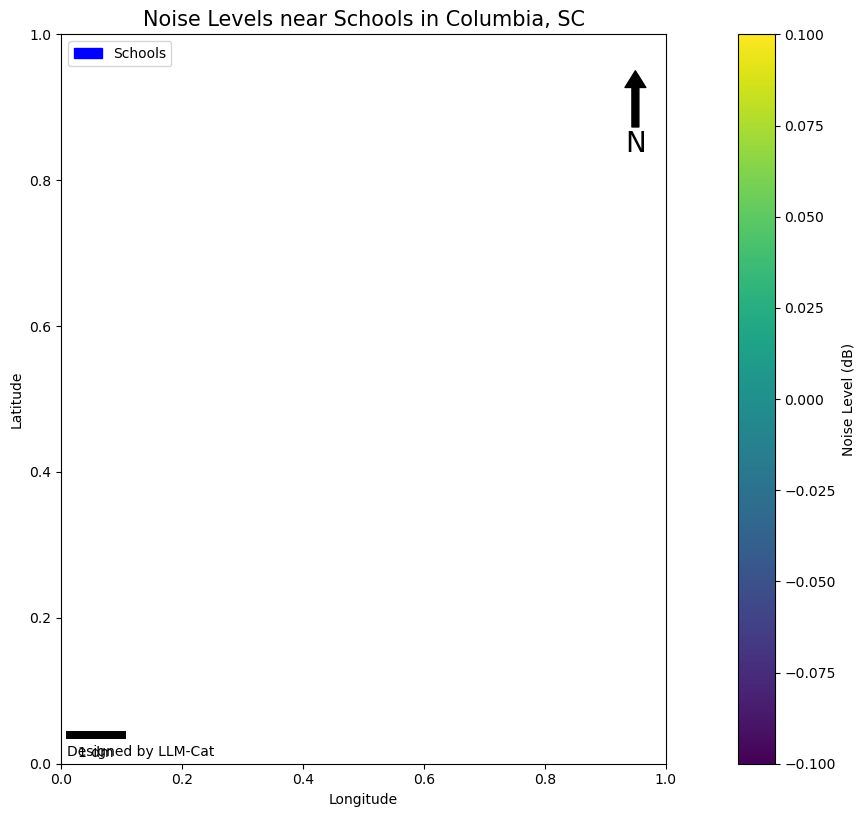



--------------- Done ---------------




In [69]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)